In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


iris = sns.load_dataset('iris')

In [4]:
iris.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Task 2

In [6]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Task 3

In [8]:
# Feature scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Implement an SVM classifier with a linear kernel
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)


SVC(kernel='linear', random_state=0)

# Task 4 

In [9]:
# Evaluate the classifier on the testing subset
y_pred = svm.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)


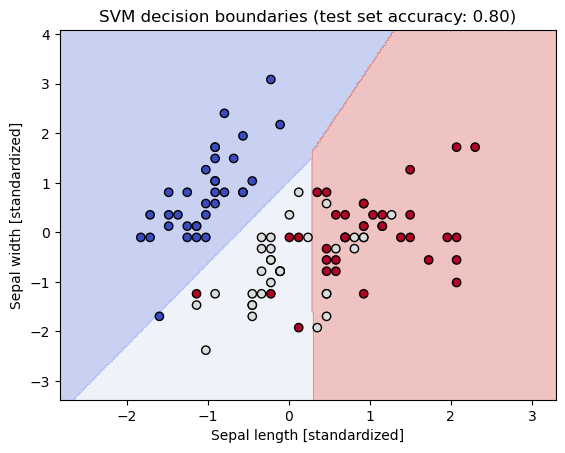

0.8

In [10]:
# Retrain using only the first two features for visualization purposes
X_train_2d = X_train_std[:, :2]
X_test_2d = X_test_std[:, :2]

# Implement an SVM classifier with a linear kernel, using only two features
svm_2d = SVC(kernel='linear', C=1.0, random_state=0)
svm_2d.fit(X_train_2d, y_train)

# Evaluate the classifier on the testing subset with two features
y_pred_2d = svm_2d.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)

# Visualize the decision boundaries for the first two features
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_2d.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Sepal width [standardized]')
plt.title(f'SVM decision boundaries (test set accuracy: {accuracy_2d:.2f})')
plt.show()

# Output the accuracy of the SVM classifier with two features
accuracy_2d